In [1]:
#filename = "ml.py"
#exec(compile(open(filename, "rb").read(), filename, 'exec'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import dateutil.parser as parser
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.cluster import KMeans

import tensorflow as tf

nltk.download('vader_lexicon')

# read the dataset into pandas dataframe
# df = pd.read_csv('./../downsampled_data', delim_whitespace=False).dropna()
df = pd.read_csv('./../downsampled_data.csv').dropna()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/trevorcarpenter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [92]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax, columns):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            for j in range(len(columns)):
                curr_sse += (float(points[i:i+1][columns[j]].values[0]) - curr_center[j]) ** 2
                

        sse.append(curr_sse)
    return sse

In [4]:
df['categoryId'] = df['categoryId'].astype(np.float)

categories = pd.DataFrame(np.zeros((len(df), len(df['categoryId'].unique()))), columns = df['categoryId'].unique())
index = 0
for id in df['categoryId']:
    categories[id][index] = 1
    index += 1

In [5]:
# display the first five rows
retrieval_time = df['time_retrieved']
publish_time = df['publishedAt']
channel_publish_time = df['Channel_publishedAt']
retrieval_time_11_19_14 = df['11_19_14_update_timestamp']
columns_to_drop = ['Unnamed: 0', 'definition', 'categoryId', 'publishedAt', 'time_retrieved', 'Channel_title', '11_19_14_update_timestamp', 'Channel_publishedAt', 'video_id', 'channelId', 'thumbnail_link', 'Channel_country']
df = df.drop(columns_to_drop, axis = 1)

In [6]:
df.columns

Index(['title', 'channelTitle', 'duration', 'trended_later', 'tags',
       'ratings_disabled', 'description', 'Channel_viewCount',
       'Channel_subscriberCount', 'Channel_hiddenSubscriberCount',
       'Channel_videoCount', 'Channel_description',
       'view_count_update_11_19_14', 'likes_update_11_19_14',
       'dislikes_update_11_19_14', 'comment_count_update_11_19_14',
       'trending?', 'engagement_rate', 'INTL', 'UNK', 'USA'],
      dtype='object')

In [7]:
index = 0
for column in categories.columns:
    df.insert(df.shape[1], "Category_"+str(column), categories[column])
    index += 1

In [8]:
## time updates
import dateutil.parser as parser
age = []
age_update = []
channel_age = []
for i in df.index:
    channel_publish_time[i] = channel_publish_time[i].replace("\"", "")
    age.append(parser.isoparse(retrieval_time[i]) - parser.isoparse(publish_time[i]))
    age_update.append(parser.isoparse(retrieval_time_11_19_14[i]) - parser.isoparse(publish_time[i]))
    channel_age.append(parser.isoparse(channel_publish_time[i]) - parser.isoparse(publish_time[i]))
    if df['ratings_disabled'][i] == 'True':
        df['ratings_disabled'][i] = True
    elif df['ratings_disabled'][i] == 'False':
        df['ratings_disabled'][i] = False
        
    if df['Channel_hiddenSubscriberCount'][i] == 'True':
        df['Channel_hiddenSubscriberCount'][i] = True
    elif df['Channel_hiddenSubscriberCount'][i] == 'False':
        df['Channel_hiddenSubscriberCount'][i] = False
        
        
    if df['trended_later'][i] == 'True':
        df['trended_later'][i] = True
    elif df['trended_later'][i] == 'False':
        df['trended_later'][i] = False

/Applications/anaconda2/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda2/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda2/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda2/envs/newEn

In [9]:
## sentiment values

titles = df['title']
channel_title = df['channelTitle']
description = df['description']
channel_description = df['Channel_description']

title_sentiment_vals = []
channel_title_sentiment_vals = []
description_sentiment_vals = []
channel_description_sentiment_vals = []

sid = SentimentIntensityAnalyzer()
for sentence in titles:
    ss = sid.polarity_scores(str(sentence))
    title_sentiment_vals.append(ss['pos']-ss['neg'])
    
for sentence in channel_title:
    ss = sid.polarity_scores(str(sentence))
    channel_title_sentiment_vals.append(ss['pos']-ss['neg'])
    
for sentence in description:
    ss = sid.polarity_scores(str(sentence))
    description_sentiment_vals.append(ss['pos']-ss['neg'])
    
for sentence in channel_description:
    ss = sid.polarity_scores(str(sentence))
    channel_description_sentiment_vals.append(ss['pos']-ss['neg'])

In [10]:
#df = df.drop(['view_count_update_11_19_14',
       #'likes_update_11_19_14', 'dislikes_update_11_19_14',
       #'comment_count_update_11_19_14', 'engagement_rate'], axis = 1)

In [11]:
from sklearn import preprocessing

df['title'] = title_sentiment_vals
df['channelTitle'] = channel_title_sentiment_vals
df['description'] = description_sentiment_vals
df['Channel_description'] = channel_description_sentiment_vals

le = preprocessing.LabelEncoder()
df['trending?'] = le.fit_transform(df['trending?'])
df['ratings_disabled'] = le.fit_transform(df['ratings_disabled'])
df['Channel_hiddenSubscriberCount'] = le.fit_transform(df['Channel_hiddenSubscriberCount'])
pd.set_option('display.max_columns', None)
df = df.dropna()

In [12]:
original_df = df.copy()

In [39]:
df = original_df.copy()

In [40]:
#df = df.drop(['view_count_update_11_19_14','likes_update_11_19_14', 'dislikes_update_11_19_14','comment_count_update_11_19_14', 'engagement_rate'], axis = 1)

In [41]:
# dummy values for now - get these interactively later...
num_hidden_layers = 4
num_hidden_layer_nodes = [20, 20, 30, 20]
train_ratio = .7
hidden_layer_activations = ['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']
optimizer = 'adam'
learning_rate = .005
loss = 'mean_squared_error'
metrics = [tf.keras.metrics.Accuracy(),tf.keras.metrics.Recall(),tf.keras.metrics.Precision()]
metrics_names = ["accuracy","recall","precision"]
epochs = 500
batch_size = 200
num_clusters = 3
original_trend_values = False

In [42]:
# Split the data into training and testing set by 70:30

In [43]:
# separate data into x and y - just random y for now..
y_column = 'trending?'
clusterer = KMeans(n_clusters = num_clusters)
if not original_trend_values:
    df = df.drop(['trending?','trended_later'], axis = 1)
    clusters = clusterer.fit(df).labels_
    print(clusterer.cluster_centers_)
    if 'cluster' in df.columns:
        df["cluster"]= clusters
    else:
        df.insert(df.shape[1], "cluster", clusters)
    y_column = 'cluster'
    
    
ratio = 0.7
train, test = train_test_split(df, train_size=ratio, random_state=42)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

train_X = train.loc[:,train.columns != y_column]
train_Y = train[y_column]
test_X = test.loc[:,test.columns != y_column]
test_Y = test[y_column]



new_train_Y = train_Y
new_test_Y = test_Y

if not original_trend_values:
    new_train_Y = []
    new_test_Y = []
    potential_y_values =np.zeros((num_clusters, num_clusters))
    for c in range(num_clusters):
        potential_y_values[c][c] = 1
    for index in range(len(train_Y)):
        new_train_Y.append(potential_y_values[train_Y[index]])
    for index in range(len(test_Y)):
        new_test_Y.append(potential_y_values[test_Y[index]])
        

[[ 1.53465704e-02  4.72238267e-02 -1.36974387e-02  1.94404332e+01
   1.08303249e-02  5.07833935e-02  2.44671939e-02  8.91076817e-02
   0.00000000e+00 -1.34121515e-01  9.35306859e-02  5.68855072e-01
   6.52799309e-01  3.55803245e-01  3.39545391e-01  1.76140201e-01
   4.65703971e-01  1.69675090e-01  3.64620939e-01  2.27436823e-01
   1.73285199e-01  4.69314079e-02  1.98555957e-01  4.69314079e-02
   6.85920578e-02  3.97111913e-02  1.08303249e-01  2.16606498e-02
   1.80505415e-02  1.44404332e-02  2.16606498e-02  3.61010830e-03
   3.61010830e-03  3.61010830e-03  3.61010830e-03]
 [ 2.72054264e-02  1.45077519e-02 -4.00885061e-02  5.28294574e+00
   3.87596899e-03  5.54844961e-02 -2.28418098e-01 -2.30385812e-01
   0.00000000e+00 -6.55238816e-02  8.12054264e-02  1.18268661e-01
   2.13593750e-01  1.33519468e-01  1.56010842e-01  1.46812465e-01
   3.99224806e-01  2.98449612e-01  3.02325581e-01  1.89922481e-01
   1.74418605e-01  4.65116279e-02  1.78294574e-01  3.87596899e-02
   1.16279070e-01  4.6511

In [50]:
df.columns

Index(['title', 'channelTitle', 'duration', 'tags', 'ratings_disabled',
       'description', 'Channel_viewCount', 'Channel_subscriberCount',
       'Channel_hiddenSubscriberCount', 'Channel_videoCount',
       'Channel_description', 'view_count_update_11_19_14',
       'likes_update_11_19_14', 'dislikes_update_11_19_14',
       'comment_count_update_11_19_14', 'engagement_rate', 'INTL', 'UNK',
       'USA', 'Category_24.0', 'Category_25.0', 'Category_26.0',
       'Category_17.0', 'Category_22.0', 'Category_20.0', 'Category_1.0',
       'Category_10.0', 'Category_23.0', 'Category_28.0', 'Category_2.0',
       'Category_27.0', 'Category_19.0', 'Category_15.0', 'Category_29.0',
       'Category_30.0', 'cluster'],
      dtype='object')

In [93]:
c_df = df.drop('cluster', axis = 1)
SSE = calculate_WSS(c_df, 10, c_df.columns)

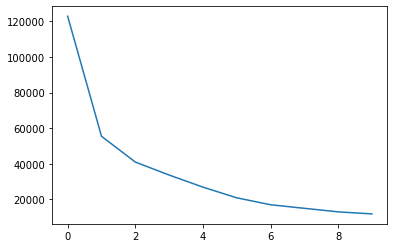

In [94]:
plt.plot(SSE)

In [18]:
# build the logistic regression model - need clean data...
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(multi_class='ovr')
LR_model.fit(train_X, train_Y)

/Applications/anaconda2/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda2/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

LogisticRegression(multi_class='ovr')

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pred_Y = LR_model.predict(test_X);
confusion_matrix(test_Y, pred_Y)

array([[50,  0,  0],
       [ 0, 72,  0],
       [ 0,  1, 87]])

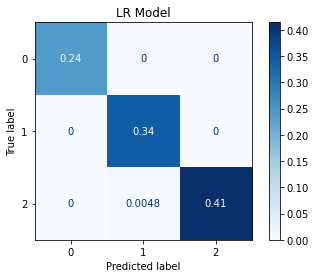

In [20]:
# confusion matrix

disp = plot_confusion_matrix(LR_model, test_X, test_Y, cmap=plt.cm.Blues, normalize = 'all')
disp.ax_.set_title("LR Model")
disp

In [21]:
# evaluate the accuracy of the LR model
accuracy = LR_model.score(test_X, test_Y)
print(accuracy)

0.9952380952380953


In [22]:
# build the ANN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

ANN_model = keras.Sequential()

# add hidden layers
for i in range(num_hidden_layers):
    if i == 0:
        ANN_model.add(Dense(num_hidden_layer_nodes[i], input_dim = train_X.shape[1], activation=hidden_layer_activations[i]))
    ANN_model.add(Dense(num_hidden_layer_nodes[i], activation=hidden_layer_activations[i]))

# add output layers
ANN_model.add(Dense(1 if original_trend_values else num_clusters, activation=hidden_layer_activations[num_hidden_layers]))

ANN_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
Total params: 2,873
Trainable params: 2,873
Non-trainable params: 0
______________________________________________________

In [23]:
# train the model
ANN_model.fit(train_X, np.array(new_train_Y), validation_data=(test_X, np.array(new_test_Y)), epochs=epochs, batch_size=batch_size)

Train on 488 samples, validate on 210 samples
Epoch 1/500
488/488 [==============================] - 1s 2ms/sample - loss: 0.2847 - accuracy: 0.0000e+00 - recall: 0.6230 - precision: 0.3115 - val_loss: 0.2853 - val_accuracy: 0.0000e+00 - val_recall: 0.5810 - val_precision: 0.2905
Epoch 2/500
488/488 [==============================] - 0s 63us/sample - loss: 0.2779 - accuracy: 0.0000e+00 - recall: 0.6230 - precision: 0.3115 - val_loss: 0.2785 - val_accuracy: 0.0000e+00 - val_recall: 0.5810 - val_precision: 0.2905
Epoch 3/500
488/488 [==============================] - 0s 110us/sample - loss: 0.2716 - accuracy: 0.0000e+00 - recall: 0.6230 - precision: 0.3115 - val_loss: 0.2721 - val_accuracy: 0.0000e+00 - val_recall: 0.5810 - val_precision: 0.2905
Epoch 4/500
488/488 [==============================] - 0s 63us/sample - loss: 0.2655 - accuracy: 0.0000e+00 - recall: 0.6230 - precision: 0.3115 - val_loss: 0.2662 - val_accuracy: 0.0000e+00 - val_recall: 0.5810 - val_precision: 0.2905
Epoch 5/50

488/488 [==============================] - 0s 76us/sample - loss: 0.2204 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2177 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 34/500
488/488 [==============================] - 0s 86us/sample - loss: 0.2204 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2177 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 35/500
488/488 [==============================] - 0s 73us/sample - loss: 0.2203 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2176 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 36/500
488/488 [==============================] - 0s 54us/sample - loss: 0.2203 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2176 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
E

488/488 [==============================] - 0s 57us/sample - loss: 0.2129 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2099 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 66/500
488/488 [==============================] - 0s 53us/sample - loss: 0.2119 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2091 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 67/500
488/488 [==============================] - 0s 52us/sample - loss: 0.2109 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2080 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 68/500
488/488 [==============================] - 0s 64us/sample - loss: 0.2098 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2069 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
E

Epoch 99/500
488/488 [==============================] - 0s 63us/sample - loss: 0.1383 - accuracy: 0.0000e+00 - recall: 0.5123 - precision: 0.6427 - val_loss: 0.1418 - val_accuracy: 0.0000e+00 - val_recall: 0.5619 - val_precision: 0.6901
Epoch 100/500
488/488 [==============================] - 0s 63us/sample - loss: 0.1367 - accuracy: 0.0000e+00 - recall: 0.5471 - precision: 0.6560 - val_loss: 0.1404 - val_accuracy: 0.0000e+00 - val_recall: 0.5857 - val_precision: 0.6989
Epoch 101/500
488/488 [==============================] - 0s 62us/sample - loss: 0.1353 - accuracy: 0.0000e+00 - recall: 0.5840 - precision: 0.6706 - val_loss: 0.1391 - val_accuracy: 0.0000e+00 - val_recall: 0.6095 - val_precision: 0.7072
Epoch 102/500
488/488 [==============================] - 0s 56us/sample - loss: 0.1340 - accuracy: 0.0000e+00 - recall: 0.6045 - precision: 0.6782 - val_loss: 0.1379 - val_accuracy: 0.0000e+00 - val_recall: 0.6286 - val_precision: 0.7097
Epoch 103/500
488/488 [==========================

488/488 [==============================] - 0s 53us/sample - loss: 0.1159 - accuracy: 0.0000e+00 - recall: 0.6721 - precision: 0.7054 - val_loss: 0.1216 - val_accuracy: 0.0000e+00 - val_recall: 0.6857 - val_precision: 0.7310
Epoch 134/500
488/488 [==============================] - 0s 70us/sample - loss: 0.1158 - accuracy: 0.0000e+00 - recall: 0.6742 - precision: 0.7060 - val_loss: 0.1214 - val_accuracy: 0.0000e+00 - val_recall: 0.6857 - val_precision: 0.7310
Epoch 135/500
488/488 [==============================] - 0s 57us/sample - loss: 0.1155 - accuracy: 0.0000e+00 - recall: 0.6742 - precision: 0.7060 - val_loss: 0.1211 - val_accuracy: 0.0000e+00 - val_recall: 0.6952 - val_precision: 0.7337
Epoch 136/500
488/488 [==============================] - 0s 56us/sample - loss: 0.1152 - accuracy: 0.0000e+00 - recall: 0.6721 - precision: 0.7054 - val_loss: 0.1207 - val_accuracy: 0.0000e+00 - val_recall: 0.7000 - val_precision: 0.7350
Epoch 137/500
488/488 [==============================] - 0s 61

488/488 [==============================] - 0s 56us/sample - loss: 0.1104 - accuracy: 0.0000e+00 - recall: 0.6906 - precision: 0.7110 - val_loss: 0.1168 - val_accuracy: 0.0000e+00 - val_recall: 0.7095 - val_precision: 0.7376
Epoch 168/500
488/488 [==============================] - 0s 56us/sample - loss: 0.1103 - accuracy: 0.0000e+00 - recall: 0.6947 - precision: 0.7122 - val_loss: 0.1167 - val_accuracy: 0.0000e+00 - val_recall: 0.7095 - val_precision: 0.7376
Epoch 169/500
488/488 [==============================] - 0s 53us/sample - loss: 0.1101 - accuracy: 0.0000e+00 - recall: 0.6947 - precision: 0.7122 - val_loss: 0.1166 - val_accuracy: 0.0000e+00 - val_recall: 0.7095 - val_precision: 0.7376
Epoch 170/500
488/488 [==============================] - 0s 57us/sample - loss: 0.1100 - accuracy: 0.0000e+00 - recall: 0.6906 - precision: 0.7110 - val_loss: 0.1166 - val_accuracy: 0.0000e+00 - val_recall: 0.7048 - val_precision: 0.7363
Epoch 171/500
488/488 [==============================] - 0s 58

488/488 [==============================] - 0s 62us/sample - loss: 0.1059 - accuracy: 0.0000e+00 - recall: 0.6988 - precision: 0.7134 - val_loss: 0.1131 - val_accuracy: 0.0000e+00 - val_recall: 0.7048 - val_precision: 0.7363
Epoch 202/500
488/488 [==============================] - 0s 76us/sample - loss: 0.1058 - accuracy: 0.0000e+00 - recall: 0.7008 - precision: 0.7140 - val_loss: 0.1129 - val_accuracy: 0.0000e+00 - val_recall: 0.7000 - val_precision: 0.7350
Epoch 203/500
488/488 [==============================] - 0s 59us/sample - loss: 0.1056 - accuracy: 0.0000e+00 - recall: 0.7008 - precision: 0.7140 - val_loss: 0.1129 - val_accuracy: 0.0000e+00 - val_recall: 0.7000 - val_precision: 0.7350
Epoch 204/500
488/488 [==============================] - 0s 61us/sample - loss: 0.1054 - accuracy: 0.0000e+00 - recall: 0.6967 - precision: 0.7128 - val_loss: 0.1130 - val_accuracy: 0.0000e+00 - val_recall: 0.7000 - val_precision: 0.7313
Epoch 205/500
488/488 [==============================] - 0s 68

488/488 [==============================] - 0s 61us/sample - loss: 0.0938 - accuracy: 0.0000e+00 - recall: 0.9734 - precision: 0.7410 - val_loss: 0.1026 - val_accuracy: 0.0000e+00 - val_recall: 0.9286 - val_precision: 0.7558
Epoch 236/500
488/488 [==============================] - 0s 54us/sample - loss: 0.0930 - accuracy: 0.0000e+00 - recall: 0.9775 - precision: 0.7384 - val_loss: 0.1013 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.7547
Epoch 237/500
488/488 [==============================] - 0s 59us/sample - loss: 0.0922 - accuracy: 0.0000e+00 - recall: 0.9836 - precision: 0.7373 - val_loss: 0.1003 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.7576
Epoch 238/500
488/488 [==============================] - 0s 58us/sample - loss: 0.0914 - accuracy: 0.0000e+00 - recall: 0.9836 - precision: 0.7373 - val_loss: 0.0994 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.7634
Epoch 239/500
488/488 [==============================] - 0s 59

488/488 [==============================] - 0s 57us/sample - loss: 0.0479 - accuracy: 0.0000e+00 - recall: 0.9877 - precision: 0.9837 - val_loss: 0.0588 - val_accuracy: 0.0000e+00 - val_recall: 0.9381 - val_precision: 0.9249
Epoch 270/500
488/488 [==============================] - 0s 66us/sample - loss: 0.0467 - accuracy: 0.0000e+00 - recall: 0.9898 - precision: 0.9797 - val_loss: 0.0579 - val_accuracy: 0.0000e+00 - val_recall: 0.9381 - val_precision: 0.9292
Epoch 271/500
488/488 [==============================] - 0s 67us/sample - loss: 0.0454 - accuracy: 0.0000e+00 - recall: 0.9898 - precision: 0.9837 - val_loss: 0.0570 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9343
Epoch 272/500
488/488 [==============================] - 0s 68us/sample - loss: 0.0443 - accuracy: 0.0000e+00 - recall: 0.9918 - precision: 0.9837 - val_loss: 0.0562 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9299
Epoch 273/500
488/488 [==============================] - 0s 56

488/488 [==============================] - 0s 63us/sample - loss: 0.0223 - accuracy: 0.0000e+00 - recall: 0.9918 - precision: 0.9918 - val_loss: 0.0401 - val_accuracy: 0.0000e+00 - val_recall: 0.9429 - val_precision: 0.9429
Epoch 304/500
488/488 [==============================] - 0s 78us/sample - loss: 0.0220 - accuracy: 0.0000e+00 - recall: 0.9939 - precision: 0.9918 - val_loss: 0.0399 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9476
Epoch 305/500
488/488 [==============================] - 0s 56us/sample - loss: 0.0213 - accuracy: 0.0000e+00 - recall: 0.9918 - precision: 0.9918 - val_loss: 0.0401 - val_accuracy: 0.0000e+00 - val_recall: 0.9429 - val_precision: 0.9340
Epoch 306/500
488/488 [==============================] - 0s 53us/sample - loss: 0.0208 - accuracy: 0.0000e+00 - recall: 0.9939 - precision: 0.9939 - val_loss: 0.0398 - val_accuracy: 0.0000e+00 - val_recall: 0.9429 - val_precision: 0.9429
Epoch 307/500
488/488 [==============================] - 0s 60

488/488 [==============================] - 0s 60us/sample - loss: 0.0125 - accuracy: 0.0000e+00 - recall: 0.9959 - precision: 0.9959 - val_loss: 0.0332 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 338/500
488/488 [==============================] - 0s 63us/sample - loss: 0.0123 - accuracy: 0.0000e+00 - recall: 0.9959 - precision: 0.9959 - val_loss: 0.0333 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 339/500
488/488 [==============================] - 0s 58us/sample - loss: 0.0121 - accuracy: 0.0000e+00 - recall: 0.9959 - precision: 0.9959 - val_loss: 0.0330 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 340/500
488/488 [==============================] - 0s 60us/sample - loss: 0.0121 - accuracy: 0.0000e+00 - recall: 0.9959 - precision: 0.9959 - val_loss: 0.0331 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 341/500
488/488 [==============================] - 0s 60

488/488 [==============================] - 0s 60us/sample - loss: 0.0080 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9571
Epoch 372/500
488/488 [==============================] - 0s 60us/sample - loss: 0.0085 - accuracy: 0.0000e+00 - recall: 0.9980 - precision: 0.9980 - val_loss: 0.0306 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9571
Epoch 373/500
488/488 [==============================] - 0s 57us/sample - loss: 0.0081 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.0000e+00 - val_recall: 0.9429 - val_precision: 0.9429
Epoch 374/500
488/488 [==============================] - 0s 49us/sample - loss: 0.0081 - accuracy: 0.0000e+00 - recall: 0.9980 - precision: 0.9980 - val_loss: 0.0310 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9571
Epoch 375/500
488/488 [==============================] - 0s 48

488/488 [==============================] - 0s 55us/sample - loss: 0.0057 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 406/500
488/488 [==============================] - 0s 66us/sample - loss: 0.0056 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9476
Epoch 407/500
488/488 [==============================] - 0s 63us/sample - loss: 0.0059 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9571
Epoch 408/500
488/488 [==============================] - 0s 54us/sample - loss: 0.0054 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9476
Epoch 409/500
488/488 [==============================] - 0s 57

488/488 [==============================] - 0s 59us/sample - loss: 0.0041 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 440/500
488/488 [==============================] - 0s 62us/sample - loss: 0.0041 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9571
Epoch 441/500
488/488 [==============================] - 0s 59us/sample - loss: 0.0040 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9571
Epoch 442/500
488/488 [==============================] - 0s 61us/sample - loss: 0.0040 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.0000e+00 - val_recall: 0.9571 - val_precision: 0.9526
Epoch 443/500
488/488 [==============================] - 0s 63

488/488 [==============================] - 0s 51us/sample - loss: 0.0032 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9476
Epoch 474/500
488/488 [==============================] - 0s 48us/sample - loss: 0.0031 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 475/500
488/488 [==============================] - 0s 50us/sample - loss: 0.0031 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.0000e+00 - val_recall: 0.9476 - val_precision: 0.9476
Epoch 476/500
488/488 [==============================] - 0s 50us/sample - loss: 0.0031 - accuracy: 0.0000e+00 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.0000e+00 - val_recall: 0.9524 - val_precision: 0.9524
Epoch 477/500
488/488 [==============================] - 0s 56

In [24]:
# confusion matrix
pred_Y = ANN_model.predict_classes(test_X);
confusion_matrix(test_Y, pred_Y)

array([[45,  0,  5],
       [ 0, 72,  0],
       [ 3,  3, 82]])

In [25]:
# report evaluation metrics 
evaluated_metrics = ANN_model.evaluate(test_X, np.array(new_test_Y))
for i in range(len(metrics)):
    print(metrics_names[i] + ": %.2f" % evaluated_metrics[i])

210/210 [==============================] - 0s 98us/sample - loss: 0.0297 - accuracy: 0.0000e+00 - recall: 0.9476 - precision: 0.9476
accuracy: 0.03
recall: 0.00
precision: 0.95
